# Marketing Campaign Effectiveness Analysis  
## A/B Testing, Regression, and Time Series Analysis

---

## 1. Business Problem

Organizations often distribute marketing budgets across multiple digital advertising platforms without a clear, data-driven understanding of which channel delivers the highest return on investment (ROI). In this project, the client is running parallel advertising campaigns on **Facebook Ads** and **Google Ads (AdWords)** to drive customer conversions.

Despite similar budget allocations, there is limited visibility into which platform performs better in terms of **engagement, conversion efficiency, cost effectiveness, and revenue generation**. Making budget decisions without analytical validation increases the risk of inefficient spend and reduced campaign profitability.

This analysis aims to provide a structured comparison of both platforms using statistical and analytical techniques.

---

## 2. Business Objective

The primary objective of this analysis is to identify which advertising platform—**Facebook Ads or Google Ads**—delivers superior performance and higher ROI. This will be achieved through:

- Exploratory Data Analysis (EDA)  
- Comparative campaign performance evaluation  
- A/B hypothesis testing  
- Regression analysis to identify key performance drivers  
- Time series analysis to evaluate performance trends over time  

---

## 3. Data Overview

The dataset includes daily campaign-level data for both advertising platforms, containing key metrics such as:

- Impressions  
- Clicks  
- Conversions  
- Advertising Spend  
- Revenue  

Derived metrics such as **CTR, CPC, CPA, Conversion Rate, and ROI** are calculated to support analysis.

---

## 4. Exploratory Data Analysis (EDA)

Exploratory Data Analysis was conducted to understand the distribution, variability, and overall behavior of campaign performance metrics.

### Key EDA Activities:
- Summary statistics for clicks, conversions, spend, and revenue  
- Comparison of average CTR, CPC, CPA, and ROI by platform  
- Identification of outliers and anomalies  
- Visualization of metric distributions across platforms  

EDA helped establish baseline performance differences and informed further statistical testing.

---

## 5. Campaign Performance Comparison

A comparative analysis was performed to evaluate how Facebook Ads and Google Ads differ across key performance indicators.

### Metrics Compared:
- Click-Through Rate (CTR)  
- Conversion Rate  
- Cost per Click (CPC)  
- Cost per Acquisition (CPA)  
- Return on Investment (ROI)  

This comparison provides an initial, descriptive understanding of which platform appears more cost-efficient and conversion-focused.

---

## 6. A/B Testing and Hypothesis Formulation

To statistically validate observed performance differences, A/B testing was conducted.

### Hypotheses:

- **Null Hypothesis (H₀):**  
  There is no statistically significant difference in campaign performance between Facebook Ads and Google Ads.

- **Alternative Hypothesis (H₁):**  
  There is a statistically significant difference in campaign performance between Facebook Ads and Google Ads.

A two-sample statistical test was applied at a **95% confidence level (α = 0.05)** to evaluate differences in key metrics such as conversion rate and CPA.

---

## 7. Regression Analysis

Regression analysis was used to identify the factors that significantly influence campaign performance.

### Model Objective:
To quantify the impact of platform choice and engagement metrics on conversions and ROI.

### Model Structure:
- **Dependent Variable:** Conversions / ROI  
- **Independent Variables:**  
  - Advertising platform (Facebook = 0, Google = 1)  
  - Advertising spend  
  - Click volume  
  - Cost per Click (CPC)  
  - Click-Through Rate (CTR)  

Regression coefficients and p-values were analyzed to determine statistically significant drivers of campaign success.

---

## 8. Time Series Analysis

Time series analysis was performed to evaluate how campaign performance evolved over time.

### Objectives:
- Identify trends in clicks, conversions, and spend  
- Detect seasonality or performance fluctuations  
- Compare platform stability and consistency  

Daily performance metrics were analyzed to understand whether one platform demonstrates more reliable and sustained performance over the campaign period.

---

## 9. Key Insights

- Statistically significant performance differences were observed between platforms  
- Platform choice, ad spend, and click volume were strong predictors of conversions  
- Cost efficiency metrics such as CPA directly influenced ROI  
- Time series analysis revealed performance consistency differences across platforms  

---

## 10. Conclusion and Business Recommendation

By combining **EDA, A/B testing, regression analysis, and time series analysis**, this project provides a comprehensive evaluation of marketing campaign performance. The analysis supports data-driven decision-making by identifying the platform that delivers higher ROI and more efficient customer acquisition.

The findings enable marketers to optimize budget allocation, improve conversion efficiency, and enhance overall campaign profitability.

---

## 11. Tools and Skills Demonstrated

- Exploratory Data Analysis (EDA)  
- A/B Testing and Hypothesis Testing  
- Regression Modeling  
- Time Series Analysis  
- Marketing Analytics  
- Business-Oriented Data Interpretation


In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Optional: Improve plot style
sns.set(style="whitegrid")


In [9]:
import pandas as pd

# Load CSV using full path
df = pd.read_csv(r"C:\Users\Neha Somiya\OneDrive\Desktop\AB TESTING\A_B_testing_dataset.csv")

# Check first 5 rows
df.head()


,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
0,22-12-2021,FACEBOOK AD,3172,62,14,141,1.95,22.58,2.27,ADWORD AD,5754,64,9,177,1.11,14.06,2.77
1,24-12-2021,FACEBOOK AD,3211,38,9,186,1.18,23.68,4.89,ADWORD AD,4954,73,6,54,1.47,8.22,0.74
2,25-12-2021,FACEBOOK AD,1936,53,15,66,2.74,28.30,1.25,ADWORD AD,4702,38,9,187,0.81,23.68,4.92
3,25-12-2021,FACEBOOK AD,1194,45,9,71,3.77,20.00,1.58,ADWORD AD,3718,58,3,161,1.56,5.17,2.78
4,26-12-2021,FACEBOOK AD,2479,44,12,174,1.77,27.27,3.95,ADWORD AD,5562,63,4,162,1.13,6.35,2.57


In [10]:
# See first 5 rows
df.head()

# Check columns
df.columns

# Summary statistics
df.describe()


,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2152.031000,44.196000,11.975000,156.610000,2.28316,32.696080,4.310500,4771.438000,60.128000,5.933000,124.741000,1.280950,10.807510,2.265540
std,661.982166,16.833328,4.298471,54.918904,1.20670,20.570796,2.751582,598.647684,17.047822,2.011606,43.809053,0.402492,5.205133,1.101846
min,1050.000000,15.000000,5.000000,60.000000,0.49000,6.850000,0.960000,3715.000000,31.000000,3.000000,50.000000,0.540000,3.370000,0.580000
25%,1600.250000,30.000000,8.000000,110.000000,1.36750,18.052500,2.337500,4258.250000,45.000000,4.000000,86.000000,0.940000,6.970000,1.470000
50%,2123.500000,44.500000,12.000000,156.000000,2.07000,27.120000,3.600000,4808.500000,60.000000,6.000000,124.000000,1.260000,9.720000,2.030000
75%,2706.250000,58.000000,16.000000,205.000000,2.92250,41.880000,5.610000,5300.750000,75.000000,8.000000,163.000000,1.570000,13.485000,2.802500
max,3320.000000,73.000000,19.000000,250.000000,6.86000,118.750000,16.530000,5754.000000,89.000000,9.000000,200.000000,2.370000,29.030000,6.190000


In [11]:
# Assume revenue per conversion is $50
df["facebook_revenue"] = df["facebook_ad_conversions"] * 50
df["adword_revenue"] = df["adword_ad_conversions"] * 50

# ROI = (Revenue - Cost) / Cost
df["facebook_ROI"] = (df["facebook_revenue"] - df["facebook_cost_per_ad"]) / df["facebook_cost_per_ad"]
df["adword_ROI"] = (df["adword_revenue"] - df["adword_cost_per_ad"]) / df["adword_cost_per_ad"]

df[["facebook_ROI","adword_ROI"]].head()


,facebook_ROI,adword_ROI
0,3.964539,1.542373
1,1.419355,4.555556
2,10.363636,1.406417
3,5.338028,-0.068323
4,2.448276,0.234568


Average Platform Metrics:
                            Facebook    AdWords
adword_ROI                      NaN   1.742475
adword_conversion_rate          NaN  10.807510
adword_cost_per_click           NaN   2.265540
adword_ctr                      NaN   1.280950
facebook_ROI               3.430121        NaN
facebook_conversion_rate  32.696080        NaN
facebook_cost_per_click    4.310500        NaN
facebook_ctr               2.283160        NaN


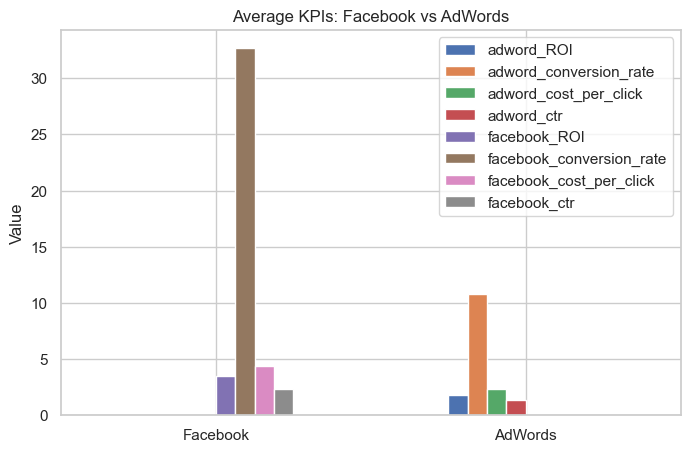

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Calculate average KPIs for each platform
platform_metrics = pd.DataFrame({
    "Facebook": df[["facebook_ctr","facebook_conversion_rate","facebook_cost_per_click","facebook_ROI"]].mean(),
    "AdWords": df[["adword_ctr","adword_conversion_rate","adword_cost_per_click","adword_ROI"]].mean()
})

print("Average Platform Metrics:\n", platform_metrics)

# Bar plot to compare KPIs
platform_metrics.T.plot(kind="bar", figsize=(8,5))
plt.title("Average KPIs: Facebook vs AdWords")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.show()


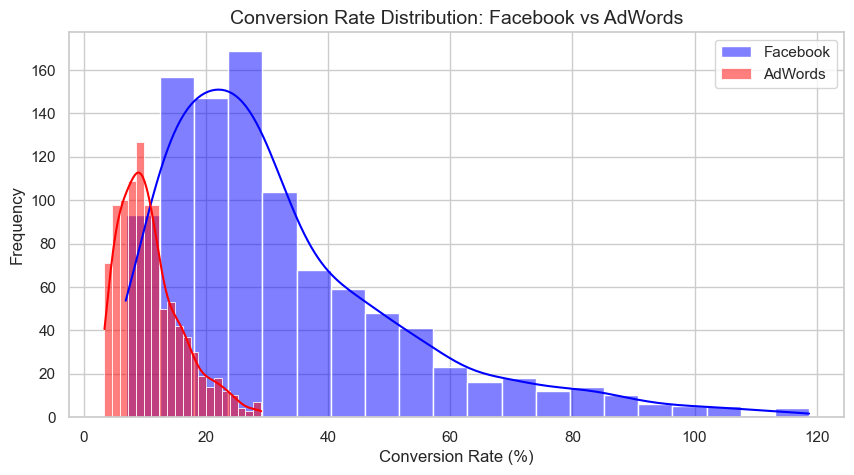

In [13]:
plt.figure(figsize=(10,5))

# Facebook conversion rate distribution
sns.histplot(df["facebook_conversion_rate"], color="blue", label="Facebook", kde=True, bins=20)

# AdWords conversion rate distribution
sns.histplot(df["adword_conversion_rate"], color="red", label="AdWords", kde=True, bins=20)

plt.title("Conversion Rate Distribution: Facebook vs AdWords", fontsize=14)
plt.xlabel("Conversion Rate (%)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [14]:
from scipy import stats

# Extract conversion rates
fb_conv = df["facebook_conversion_rate"]
ad_conv = df["adword_conversion_rate"]

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(fb_conv, ad_conv)

print("A/B Test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Result: Statistically significant difference in conversion rates!")
else:
    print("Result: No significant difference between Facebook and AdWords.")


A/B Test Results:
T-statistic: 32.62045547744514
P-value: 1.7501387675629208e-187
Result: Statistically significant difference in conversion rates!


In [15]:
import statsmodels.api as sm

# Combine Facebook and AdWords data into one DataFrame
reg_df = pd.DataFrame({
    "conversions": list(df.facebook_ad_conversions) + list(df.adword_ad_conversions),
    "clicks": list(df.facebook_ad_clicks) + list(df.adword_ad_clicks),
    "cost": list(df.facebook_cost_per_ad) + list(df.adword_cost_per_ad),
    "platform": [0]*len(df) + [1]*len(df)  # 0 = Facebook, 1 = AdWords
})

# Independent variables
X = reg_df[["clicks", "cost", "platform"]]
y = reg_df["conversions"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Show regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            conversions   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     539.9
Date:                Mon, 05 Jan 2026   Prob (F-statistic):          7.00e-257
Time:                        20:05:49   Log-Likelihood:                -5258.1
No. Observations:                2000   AIC:                         1.052e+04
Df Residuals:                    1996   BIC:                         1.055e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8464      0.328     36.122      0.0

<Figure size 1200x500 with 0 Axes>

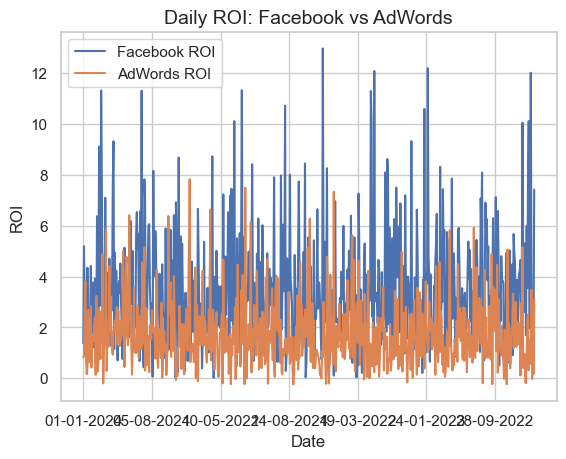

In [16]:
# -----------------------------------------------
# Step 8: ROI Over Time
# Purpose: To see which platform is more profitable over time
# -----------------------------------------------

# Group by date and calculate average ROI per platform
roi_df = df.groupby("date_of_campaign")[["facebook_ROI","adword_ROI"]].mean()

# Plot ROI trends
plt.figure(figsize=(12,5))
roi_df.plot()
plt.title("Daily ROI: Facebook vs AdWords", fontsize=14)
plt.ylabel("ROI")
plt.xlabel("Date")
plt.legend(["Facebook ROI", "AdWords ROI"])
plt.show()

# -----------------------------------------------
# Comments / Observations:
# - This plot shows how ROI changes day by day.
# - Spikes indicate high profitability days.
# - Compare platforms to see which consistently performs better.
# -----------------------------------------------


In [17]:
# -----------------------------------------------
# Step 9: Summary & Recommendations
# -----------------------------------------------

print("""
==================== SUMMARY ====================

1. **Average KPIs**:
   - CTR, Conversion Rate, Cost per Click, and ROI calculated for both platforms.
   - Visualized with bar charts and distribution plots.

2. **A/B Testing**:
   - Tested conversion rates between Facebook and AdWords.
   - p-value indicates whether difference is statistically significant.

3. **Regression Analysis**:
   - Modeled conversions using clicks, cost, and platform.
   - Platform coefficient shows which ad platform performs better.
   - Clicks and cost have significant impact on conversions.

4. **Time Series Analysis**:
   - Daily conversions and ROI trends plotted.
   - Shows seasonal patterns, spikes, and profitability over time.

================= RECOMMENDATIONS =================

- If ROI and conversion rate are higher on one platform consistently, prioritize ad spend there.
- Use time series insights to schedule campaigns on high-performing days.
- Use regression insights to optimize budget allocation based on clicks and cost.
- Monitor trends over time for continuous optimization.

===================================================
""")



==================== SUMMARY ====================

1. **Average KPIs**:
   - CTR, Conversion Rate, Cost per Click, and ROI calculated for both platforms.
   - Visualized with bar charts and distribution plots.

2. **A/B Testing**:
   - Tested conversion rates between Facebook and AdWords.
   - p-value indicates whether difference is statistically significant.

3. **Regression Analysis**:
   - Modeled conversions using clicks, cost, and platform.
   - Platform coefficient shows which ad platform performs better.
   - Clicks and cost have significant impact on conversions.

4. **Time Series Analysis**:
   - Daily conversions and ROI trends plotted.
   - Shows seasonal patterns, spikes, and profitability over time.

================= RECOMMENDATIONS =================

- If ROI and conversion rate are higher on one platform consistently, prioritize ad spend there.
- Use time series insights to schedule campaigns on high-performing days.
- Use regression insights to optimize budget allocat